<a href="https://colab.research.google.com/github/SaW2017/ClearingDesire_AI_ML/blob/master/Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

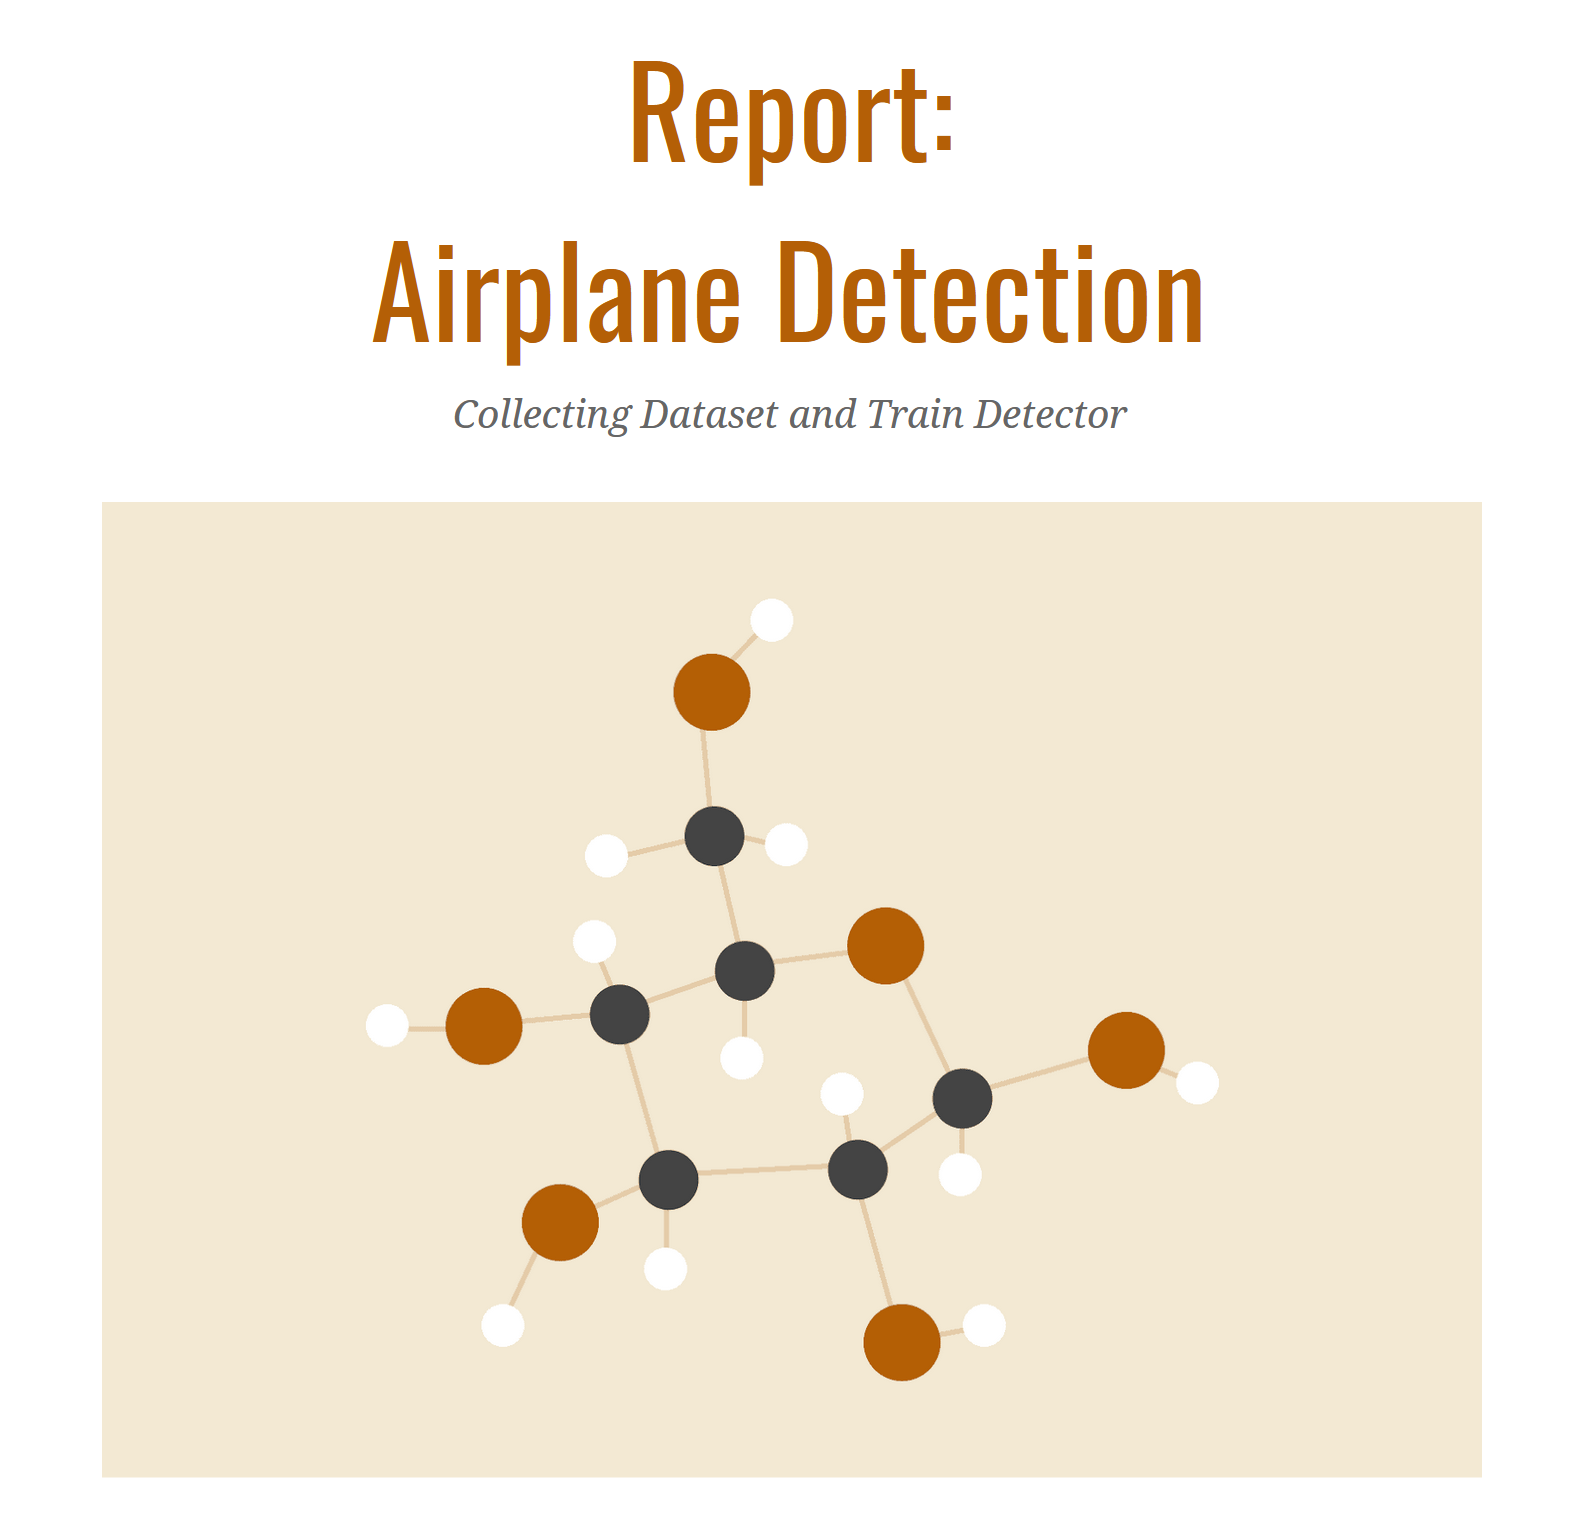

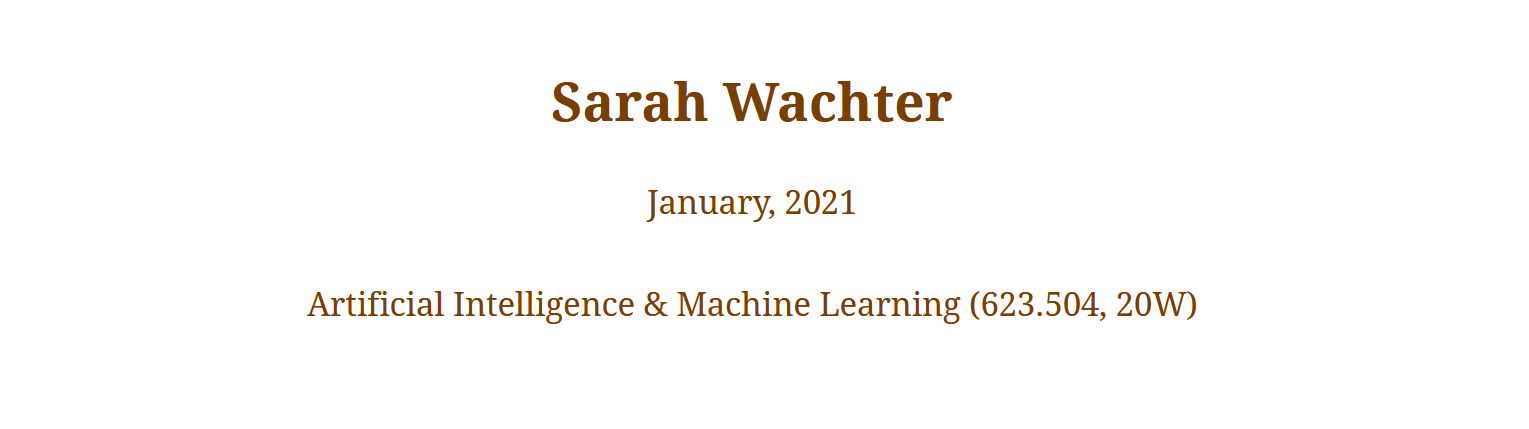

<h1>Introduction</h1>

<p align = "justify">
The original approach was to create an airplane call sign recognition. Due to circumstances, I decided to start the project with a Custom Object Detection with YOLO on Google Colab. Therefore I decided to recognize airplanes in order to make my data available to my project partner if necessary, so that he can work with it to implement his call sign recognition. </p>


<h1>Data Collection</h1>

<p align="justify">
As already mentioned, I started with airplane detection. To do this, I first had to collect data in the form of images. According to research, there are two ways to get useful images. Do it yourself or collect it on the Internet and then go through each image using programs such as LabelImg and create a rectangle with a label.
The second option is to use existing datasets which already have border boxes and labels. 
<br/>
There are various websites with Image-Data-Sets:

* https://cocodataset.org/#download
*   http://host.robots.ox.ac.uk/pascal/VOC/
* http://www.svcl.ucsd.edu/projects/universal-detection/
* https://www.superb-ai.com/datasets
*   https://www.kaggle.com/datasets

</p>
<p align="justify">
In this project I decided to use the COCO (Common Objects in Context) dataset. I chose COCO because on their website they state that
"Each year's images are associated with different tasks."
And there are a lot of datasets suitable for detecting objects. Furthermore Coco is a large-scale object detection, segmentation, and captioning dataset with over 200k labeled pictures.
<br/>
In the following Colab-Notebook, I show you how I collected and transformed the required data.
</p>

# Download the Datasets

<p align="justify">
I downloaded and unzipped the following datasets from COCO:

*  annotations_trainval2017.zip
*  stuff_annotations_trainval2017.zip
*  val2017.zip
*  train2017.zip
</p>

In [ ]:
# Download the DataSets
!wget http://images.cocodataset.org/zips/train2017.zip

--2021-02-05 06:47:45--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.176.59
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.176.59|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘train2017.zip’

train2017.zip       100%[===================>]  18.01G  78.4MB/s    in 5m 6s   

2021-02-05 06:52:52 (60.2 MB/s) - ‘train2017.zip’ saved [19336861798/19336861798]



In [ ]:
!wget http://images.cocodataset.org/zips/val2017.zip

--2021-02-05 06:47:32--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.82.108
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.82.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘val2017.zip.1’

val2017.zip.1       100%[===================>] 777.80M  95.4MB/s    in 8.1s    

2021-02-05 06:47:40 (95.9 MB/s) - ‘val2017.zip.1’ saved [815585330/815585330]



In [ ]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip

--2021-02-05 06:47:10--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.43.76
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.43.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  69.6MB/s    in 3.5s    

2021-02-05 06:47:13 (69.6 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]



In [ ]:
!wget http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip

--2021-02-05 06:47:13--  http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.77.4
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.77.4|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1148688564 (1.1G) [application/zip]
Saving to: ‘stuff_annotations_trainval2017.zip’

stuff_annotations_t 100%[===================>]   1.07G  64.7MB/s    in 16s     

2021-02-05 06:47:30 (67.5 MB/s) - ‘stuff_annotations_trainval2017.zip’ saved [1148688564/1148688564]



In [ ]:
# unzip the Datasets
# %%capture grabs all output types, 
# not just stdout/stderr, 
# so you can do plots and use IPython's display system inside %%capture
%%capture
!unzip stuff_annotations_trainval2017.zip

In [ ]:
%%capture
!unzip annotations_trainval2017.zip

In [ ]:
%%capture
!unzip val2017.zip

In [ ]:
%%capture
!unzip train2017.zip

# Download and install needed Libraries and Modules

<p align="justify">
Further Toolkits are needed: 

*   GluonCV - https://cv.gluon.ai/contents.html
*   Apache MXNet (Incubating) Python Package - https://pypi.org/project/mxnet/
*   Matplotlib - https://matplotlib.org/stable/index.html
*   OpenCV-Python - https://pypi.org/project/opencv-python/
*   NumPy - https://numpy.org/doc/stable/user/whatisnumpy.html

GluonCV is a Deep Learning Toolkit for Computer Vision. I used the modules data and utils from this toolkit. Data provides data loaders and transformers for popular datasets like COCO. Utils provide a lot of functions like visualization, file handler, download and training helpers. 
<br/>
MXNet is a deep learning framework, which allows to mix other deep learning programs together to maximize the efficiency. 
<br/>
Matplotlib is a plotting library for the Python programming language.
<br/>
OpenCV-Python is a module which can be used to read, display and save images. Here it is used to resize and interpolate the images to watch them in the VM. And also it`s used to transform colors.
<br/>
NumPy is a package for scientific computing. It provides a multidimensional array object. As the homepage stated:
> NumPy arrays facilitate advanced mathematical and other types of operations on large numbers of data. Typically, such operations are executed more efficiently and with less code than is possible using Python’s built-in sequences.

For further information - please look at the comments in the code.
</p>

In [ ]:
# read the DataSet - https://cv.gluon.ai/build/examples_datasets/mscoco.html
# First Install the things we need
!pip install gluoncv

     |████████████████████████████████| 1.1MB 5.5MB/s 
     |████████████████████████████████| 11.8MB 8.9MB/s 
     |████████████████████████████████| 317kB 30.8MB/s 
     |████████████████████████████████| 307kB 52.1MB/s 
     |████████████████████████████████| 972kB 42.1MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 102kB 9.2MB/s 
     |████████████████████████████████| 215kB 44.7MB/s 
     |████████████████████████████████| 675kB 42.0MB/s 
     |████████████████████████████████| 102kB 10.8MB/s 
     |████████████████████████████████| 7.2MB 37.2MB/s 
     |████████████████████████████████| 71kB 7.6MB/s 
     |████████████████████████████████| 962kB 53.2MB/s 
     |████████████████████████████████| 71kB 7.8MB/s 
     |████████████████████████████████| 2.6MB 43.1MB/s 
     |████████████████████████████████| 102kB 10.3MB/s 
  Created wheel for ConfigSpace: filenam

In [ ]:
# https://pypi.org/project/mxnet/
!pip install mxnet

     |████████████████████████████████| 55.0MB 141kB/s 


In [ ]:
# Check if everything got downloaded & installed
!ls

annotations		      stuff_annotations_trainval2017.zip  val2017
annotations_trainval2017.zip  train2017				  val2017.zip
sample_data		      train2017.zip			  val2017.zip.1


In [ ]:
# Loading images and labels with gluoncv.data.COCODetection
from gluoncv import data, utils
from matplotlib import pyplot as plt

train_dataset = data.COCODetection(root='.',splits=['instances_train2017'])
val_dataset = data.COCODetection(root='.',splits=['instances_val2017'])
print('Nr of training images:', len(train_dataset))
print('Nr of validation images:', len(val_dataset))

loading annotations into memory...
Done (t=31.02s)
creating index...
index created!
loading annotations into memory...
Done (t=0.95s)
creating index...
index created!
Num of training images: 117266
Num of validation images: 4952


(427, 640, 3)
Image size (height, width, RGB): (427, 640, 3)
Num of objects: 1
Bounding boxes (num_boxes, x_min, y_min, x_max, y_max):
 [[ 61.41 104.65 514.28 418.39]]
Class IDs (num_boxes, ):
 [[21.]]


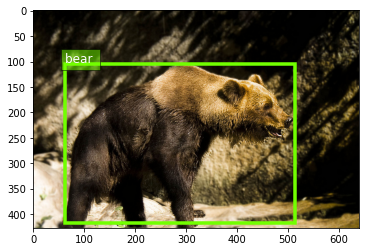

In [ ]:
# print random picture to check if dataset and labels are correctly downloaded '
train_image, train_label = train_dataset[1114]
bounding_boxes = train_label[:, :4]
class_ids = train_label[:, 4:5]
print(train_image.shape)
print('Image size (height, width, RGB):', train_image.shape)
print('Num of objects:', bounding_boxes.shape[0])
print('Bounding boxes (num_boxes, x_min, y_min, x_max, y_max):\n',
      bounding_boxes)
print('Class IDs (num_boxes, ):\n', class_ids)

utils.viz.plot_bbox(train_image.asnumpy(), bounding_boxes, scores=None,
                    labels=class_ids, class_names=train_dataset.classes)
plt.show()

# OpenCV Demonstration

In [ ]:
#OpenCV demo
# is used to show an image with the borderbox in the VM
def imShowCv(image):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))

TRain_Label Shape:  (1, 5)
Coordinates of bpunding boxes:
[[  0.96 228.08 316.61 418.99]]
Class-IDs:
[[2.]]
<class 'numpy.ndarray'>


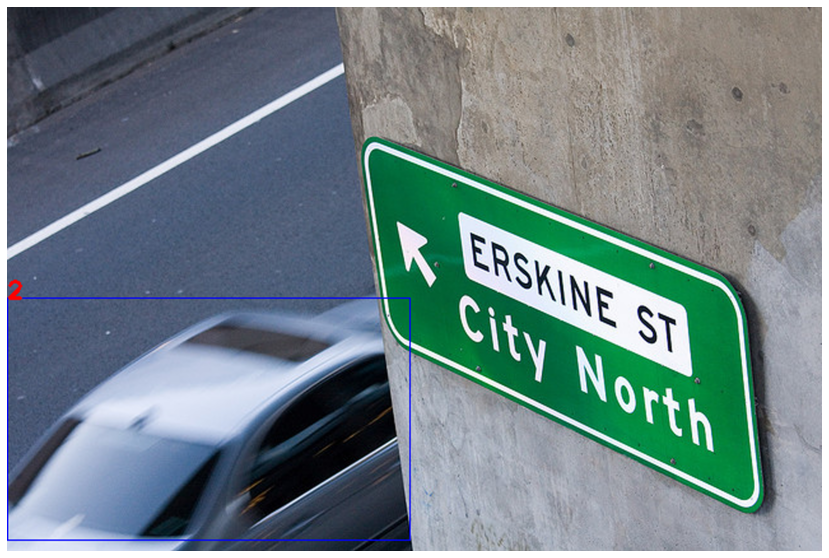

In [ ]:
import cv2
import numpy as np

# grapping the images, the bounding boxes and class IDs
train_image, train_label = train_dataset[97552]
bounding_boxes = train_label[:, :4]
class_ids = train_label[:, 4:5]
print('TRain_Label Shape: ',train_label.shape)
print('Coordinates of bounding boxes:')
print(bounding_boxes)
print('Class-IDs:')
print(class_ids)

# convert the image to numpy-array
train_image = train_image.asnumpy()
print(type(train_image))

# Changing its color-scheme from BGR to RGB
train_image = cv2.cvtColor(train_image, cv2.COLOR_BGR2RGB)

# iterating over the Class-IDs
# specific bounding boxes belongs to specific class id
# and we have to pair them for CV
for i in range(len(class_ids)):
  
  class_id = str(int(class_ids[i][0]))
  bbox = bounding_boxes[i]
  
  x1 = int(bbox[0])
  y1 = int(bbox[1])
  x2 = int(bbox[2])
  y2 = int(bbox[3])
  
  
  cv2.rectangle(train_image, (x1, y1), (x2, y2), (255, 0, 0), 1)
  cv2.putText(train_image,class_id, (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, .6,(0, 0, 255),2)
  
 # to check visually the image 
imShowCv(train_image)


# Collecting Airplane - Pictures for the Project

<p align="justify">
It is important to go through the COCO-Dataset and pick out every image which shows an airplane. It is also essential to convert the images to the YOLO format.
During my research I found this page:
<a href="https://www.visiongeek.io/2019/10/preparing-custom-dataset-for-training-yolo-object-detector.html"> VisionGeek Preparing a Dataset for YOLO</a>
which helps me a lot.
<br/> 
How to do this step by step is commented in the code. The YOLO-Format  looks like this:</p>

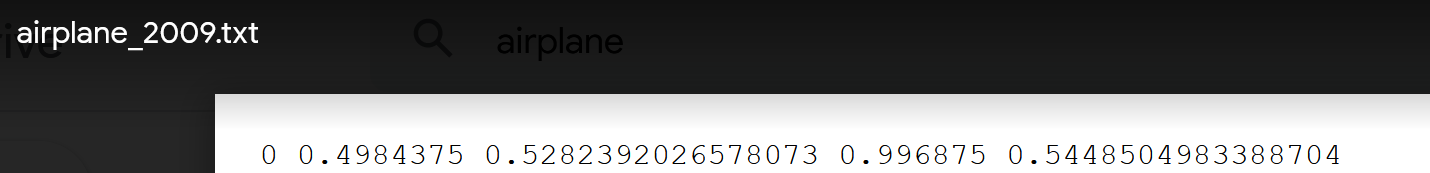


<p align="justify">The first number 0 is the object-id, because I decided to train the detector just on airplanes, the object-id is always 0, because there is just one class existing, and the index starts with zero. The second number 0.49... and the third number 0.52... are the x-center and y-center-coordinates from the center point of the bounding box. Due to normalization (dividing by the width and height of the image)  they are just between 0 and 1. The third number 0.99... is the width and the last number 0.54... is the height of the bounding box.
<br/>
For every image there exists a txt-file with the identical name in which this information is saved.
</p>

In [ ]:
# Defining the YOLO-Format object-id center_x center_y width height
# object-id = number of the corresponding category see: 
# https://github.com/pjreddie/darknet/blob/master/data/coco.names
# beware index starts at 0!
def yolo_format(object_id, point_1, point_2, width, height):
    # YOLO wants everything normalized
    # Order: class x_center y_center x_width y_height
    x_center = (point_1[0] + point_2[0]) / float(2.0 * width)
    y_center = (point_1[1] + point_2[1]) / float(2.0 * height)
    x_width = float(abs(point_2[0] - point_1[0])) / width
    y_height = float(abs(point_2[1] - point_1[1])) / height
    return str(object_id) + " " + str(x_center) \
       + " " + str(y_center) + " " + str(x_width) + " " + str(y_height)

 # Defining how to save the txt 
def save_bb(txt_path, line):
    with open(txt_path, 'a') as myfile:
        myfile.write(line + "\n") # append line

In [ ]:
# make two directories: one for 'bounding boxes txt' and one for the airplanes
!mkdir bbox_txt
!mkdir images


In [ ]:
# check if it worked
!ls

annotations		      sample_data			  val2017
annotations_trainval2017.zip  stuff_annotations_trainval2017.zip  val2017.zip
bbox_txt		      train2017				  val2017.zip.1
images			      train2017.zip


In [ ]:
import cv2
import os

# setting the folders as variables
n=0
# at the second run I put all the images with text in one folder
imgFolder = 'images'
txtFolder = 'bbox_txt'

#id of the class in training of the YOLO model
label_class_id = 0


# iterating over the dataset
for i in range(len(train_dataset)):
  
  if i % 500 == 0:
    print(i)
    print('images of interest',n)
  
  train_image, train_label = train_dataset[i]
  bounding_boxes = train_label[:, :4]
  class_ids = train_label[:, 4:5]
  
# to see the lists of objects in the coco-dataset  
# https://github.com/pjreddie/darknet/blob/master/data/coco.names
# aeroplane index 4
  if 4 in class_ids:
    
    name = 'airplane_'+str(n)
    txtPath = os.path.join(txtFolder, name)+'.txt'
    imgPath = os.path.join(imgFolder, name) +'.jpg'
    #print(txtPath, imgPath)
    
    
    
    
    #utils.viz.plot_bbox(train_image.asnumpy(), bounding_boxes, scores=None,
                    #labels=class_ids, class_names=train_dataset.classes)
    
    # convert image to numpy array
    image = train_image.asnumpy()
    height, width = image.shape[:2]
    
    #print(bounding_boxes)
    #print(class_ids)
    
    # iterate over each indiviual class-id
    for j in range(len(class_ids)):
      
      if class_ids[j]==4:
        
        # then we get the bounding box coordinates
        x1 = int(bounding_boxes[j][0])
        y1 = int(bounding_boxes[j][1])
        x2 = int(bounding_boxes[j][2])
        y2 = int(bounding_boxes[j][3])
        
        
        # format it to 'YOLO-Format' & save it as txt-file
        line = yolo_format(label_class_id,(x1,y1),(x2,y2),width, height)
        save_bb(txtPath, line)
        
        
    n+=1
    
        
        #cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255,0,0), 2)
    
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    cv2.imwrite(imgPath,image)
    
    #plt.show()
      
print(n)

0
images of interest 0
500
images of interest 19
1000
images of interest 28
1500
images of interest 45
2000
images of interest 64
2500
images of interest 84
3000
images of interest 94
3500
images of interest 107
4000
images of interest 115
4500
images of interest 123
5000
images of interest 131
5500
images of interest 139
6000
images of interest 148
6500
images of interest 158
7000
images of interest 168
7500
images of interest 183
8000
images of interest 189
8500
images of interest 204
9000
images of interest 215
9500
images of interest 223
10000
images of interest 231
10500
images of interest 237
11000
images of interest 247
11500
images of interest 254
12000
images of interest 263
12500
images of interest 279
13000
images of interest 289
13500
images of interest 303
14000
images of interest 314
14500
images of interest 325
15000
images of interest 341
15500
images of interest 354
16000
images of interest 374
16500
images of interest 388
17000
images of interest 402
17500
images of i

KeyboardInterrupt: ignored

In [ ]:
# put the to folders in one zip-archive for backup ;)
!zip -r label.zip bbox_txt images

Streaming output truncated to the last 5000 lines.
updating: bbox_txt/airplane_2158.txt (deflated 17%)
updating: bbox_txt/airplane_36.txt (deflated 13%)
updating: bbox_txt/airplane_2093.txt (deflated 21%)
updating: bbox_txt/airplane_1448.txt (deflated 17%)
updating: bbox_txt/airplane_223.txt (deflated 30%)
updating: bbox_txt/airplane_2448.txt (deflated 18%)
updating: bbox_txt/airplane_404.txt (deflated 19%)
updating: bbox_txt/airplane_2053.txt (deflated 61%)
updating: bbox_txt/airplane_1316.txt (deflated 20%)
updating: bbox_txt/airplane_625.txt (deflated 16%)
updating: bbox_txt/airplane_2149.txt (deflated 45%)
updating: bbox_txt/airplane_761.txt (deflated 23%)
updating: bbox_txt/airplane_2220.txt (deflated 45%)
updating: bbox_txt/airplane_1973.txt (deflated 22%)
updating: bbox_txt/airplane_2086.txt (deflated 49%)
updating: bbox_txt/airplane_527.txt (deflated 14%)
updating: bbox_txt/airplane_1454.txt (deflated 31%)
updating: bbox_txt/airplane_2751.txt (deflated 49%)
updating: bbox_txt/a

In [ ]:
# check how many pictures we got and
# if everything worked out - both lengths 
# have to be the same size
print(len(os.listdir('images')))
print(len(os.listdir('bbox_txt')))

2872
2872


# Check!

<p align="justify">
Size is the same. Now it is time to start with setting up the Virtual Machine for YOLO.
Please check the second Notebook.

</p>